### Clustering(Based on geographic locations)

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

data = pd.read_csv('country_clusters.csv')

### Plotting the data


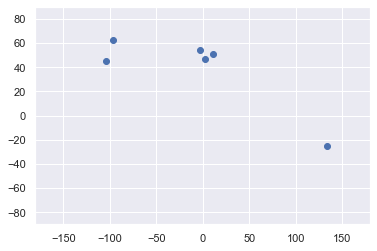

In [79]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Selecting the features

In [80]:
x = data.iloc[:,1:3]

#KMeans(NO.Of Clusters)
kmeans = KMeans(3)
kmeans.fit(x)
identifiedClusters = kmeans.fit_predict(x)
results = data.copy()
results['Cluster']=identifiedClusters

### Plotting the results

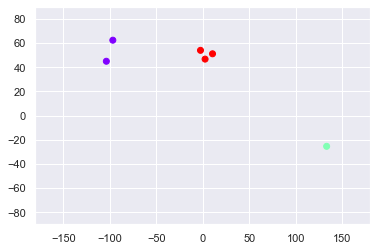

In [81]:
plt.scatter(results['Longitude'],results['Latitude'],c=results['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Selecting the number of clusters

### Elbo method

Text(0, 0.5, 'Within-cluster sum of square')

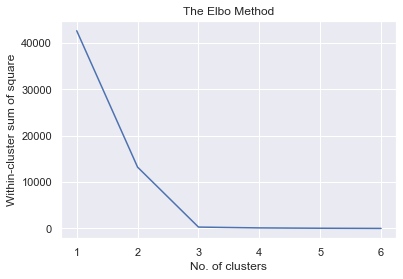

In [82]:
wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,7),wcss)
plt.title('The Elbo Method')
plt.xlabel('No. of clusters')
plt.ylabel('Within-cluster sum of square')

### Clustering(Market segmentation)

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
sns.set()

data = pd.read_csv('market_segmentation.csv')

In [112]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

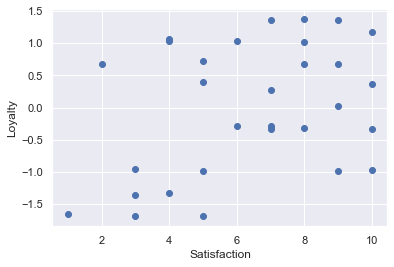

In [113]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### Standardizing the variables

In [118]:
def preProcess(x):
    return preprocessing.scale(x)
    

In [129]:
xPreProcessed = preProcess(data.copy())
kmeans = KMeans(3)
kmeans.fit(xPreProcessed)


KMeans(n_clusters=3)

In [130]:
identifiedClusters = kmeans.fit_predict(xPreProcessed)
results = data.copy()
results['Cluster']= identifiedClusters

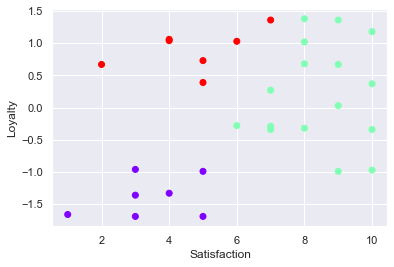

In [131]:
plt.scatter(results.iloc[:,0],results.iloc[:,1],c=results.iloc[:,2],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

Text(0, 0.5, 'Within-cluster sum of square')

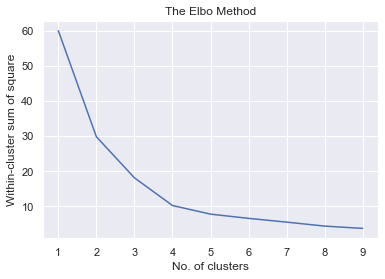

In [132]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(xPreProcessed)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.title('The Elbo Method')
plt.xlabel('No. of clusters')
plt.ylabel('Within-cluster sum of square')